<a href="https://colab.research.google.com/github/Lucasllops/Crimes-Rio-de-Janeiro/blob/main/An%C3%A1lise_de_crimes_no_estado_do_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados estatísticos de violência no estado do Rio de Janeiro

O **Rio de Janeiro** é um grande estado brasileiro que se localiza na região sudeste do país, segundo o IBGE a estimativa de população para o ano de 2021 era de **17 milhões de habitantes**, sendo o terceiro maior estado brasileiro atrás de São Paulo e Minas Gerais.

Dono de belas praias e muitos pontos turisticos, tais como o pão de açucar e o cristo redentor, o estado leva fama por ser um dos que possuem maior **índice de criminalidade** do país, em consideração a tal afirmação resolvemos análisar os dados de criminalidade disponibilizados pelo instituto de segurança pública em seu [portal](http://www.ispdados.rj.gov.br/) de dados abertos para o estado do Rio de Janeiro. Os dados apresentam de forma mensal os números de diversos tipos de crimes, no periodo de **janeiro de 1991 à abril de 2022**.

Tentaremos através de *transformações nos dados*, análisar tendências e padrões ao longo dos anos, assim como plotaremos gráficos para melhor visualização de como os dados estão organizados afim de tirarmos algumas **conclusões ao final da análise**.

#Análise inicial

Importação das bibliotecas a serem usadas, visualização inicial dos dados, verificação de quais variáves serão trabalhadas bem como seus tipos.

In [41]:
#importar a biblioteca pandas
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#importando a base de dados
df = pd.read_csv('/content/drive/MyDrive/dados/DOMensalEstadoDesde1991.csv', sep=';')

In [3]:
#verificar a quantidade de linhas e variáveis o dataframe possui
df.shape

(376, 56)

In [4]:
#verificar as primeiras linhas do dataframe
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,,15,,,672,162,3051,...,,,,,217,,,,,3
1,1991,2,732,,17,,,749,175,3421,...,,,,,209,,,,,3
2,1991,3,713,,25,,,738,216,3613,...,,,,,188,,,,,3
3,1991,4,634,,20,,,654,200,3211,...,,,,,140,,,,,3
4,1991,5,650,,20,,,670,146,3051,...,,,,,78,,,,,3


### **Q1. Quais as variáveis presentes no dataframe e seus tipos ?**

É importante saber com quais variáveis vamos trabalhar, pois há uma quantidade consideravel de variáveis presentes no dataframe, além disso o tipo de cada variável deve ser observado, para sabermos de que forma trabalhar com elas.

In [5]:
#tipo de cada variável.
df.dtypes

ano                            int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
cvli                          object
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_transeunte               int64
roubo_celular                 object
roubo_em_coletivo              int64
roubo_rua                      int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_comercio                 int64
roubo_residencia               int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
t

## Diciónario de Variáveis

* **ano** - Ano em que o dado foi coletado.
* **mes** - Mês em que o dado foi coletado.
* **hom_doloso** - Número de homicídios dolosos (casos em que há intensão de matar).
* **lesao_corp_morte** - Número de lesões corporais seguidas de morte (agressão física que causa morte).
* **latrocinio** - Número de latrocinios (roubo seguido de morte).
* **cvli** - Número de crimes violentos.
* **hom_por_interv_policial** - homicídio por intervenção policial.
* **letalidade_violenta** - É uma junção das variáveis anteriores.
* **tentat_hom** - Número de tentativas de homicídios.
* **lesao_corp_dolosa** - Lesão corporal intencional.
* **estupro** - Número de casos de estupro.
* **hom_culposo** - Número de homicídios em que não houve intensão de matar.
* **lesao_corp_culposa** - Número de casos de lesão corporal sem intensão.
* **roubo_transeunte** - Número de roubos à pessoas que estão se deslocando e são abordadas.
* **roubo_celular** - Número de roubos de celulares.
* **roubo_em_coletivo** - Número de roubos que acontem em transportes coletivos.
* **roubo_rua** - Número de roubo que acontem em ruas.
* **roubo_veiculo** - Número de roubo de veículos.
* **roubo_carga** - Número de roubos de cargas.
* **roubo_comercio** - Número de roubos à estabelicimentos comerciais.
* **roubo_residencia** - Número de roubos à residencias.
* **roubo_banco** - Número de roubos à bancos.
* **roubo_cx_eletronico** - Número de casos à caixas eletrônicos. 
* **roubo_conducao_saque** - Número de roubos em que o individuo leva a pessoa para sacar dinheiro no caixa.
* **roubo_apos_saque** - Número de roubos em que a vitima foi roubada após sacar dinheiro.
* **roubo_bicicleta** - Número de roubos de bicicleta.
* **outros_roubos** - Número de tipos diversos de roubo.
* **total_roubos** - Número total de roubos.
* **furto_veiculos** - Número de furtos à veículos.
* **furto_transeunte** - Número de furtos à transeuntes
* **furto_coletivo** - Número de furtos que ocorrem em coletivos.
* **furto_celular** - Número de furtos à celulares.
* **furto_bicicleta** - Número de furtos à bicicletas.
* **outros_furtos** - Número de furtos diversos.
* **total_furtos** - Número total de furtos.
* **sequestro** - Número de sequestros.
* **extorsao** - Número de sequestros.
* **sequestro_relampago** - Número de sequestros relâmpagos.
* **estelionato** - Número de casos de estelionato.
* **apreensao_drogas** - Número de apreensões de drogas.
* **posse_drogas** - Número de casos de posse de drogas.
* **trafico_drogas** - Número de casos de tráfico de drogas.
* **apreensao_drogas_sem_autor** - Número de casos de apreensão de drogas onde não se encontra o dono.
* **recuperacao_veiculos** - Número de vezes que veículos foram recuperados.
* **apf** - Prisão em flagrante.
* **aaapai** - Auto de apreensão de adolescente por ato infracional. 
* **cmp** - Não consegui identificar.
* **cmba** - Não consegui identificar.
* **ameaca** - Número de casos resgistrados de ameaças 
* **pessoas_desaparecidas** - Número de ocorrências de pessoas desaparecidas.
* **encontro_cadaver** - Número de vezes em que cadaveres foram encontrados.
* **encontro_ossada** - Número de vezes em que ossadas foram encontradas.
* **pol_militares_mortos_serv** - Número de policiais militares mortos em serviço.
* **pol_civis_mortos_serv** - Número de policiais civis mortos em serviço.
* **registro_ocorrencias** - Número de registro de ocorrências.
* **fase** - Não consegui identificar.

### **Q2. Qual a quantidade de dados nulos ?**

Para se fazer uma boa análise é **necessario que a base de dados seja integra**, e que possa fornercer dados sulficientes para a análise, por isso verificaremos a quantidade em porcentagem de dados que estão faltando em cada coluna, para que dependendo dessa quantidade possamos seguir a melhor rota de **transformação para dados nulos**.

In [6]:
df.isna().sum() / df.shape[0] 

ano                           0.0
mes                           0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
cvli                          0.0
hom_por_interv_policial       0.0
letalidade_violenta           0.0
tentat_hom                    0.0
lesao_corp_dolosa             0.0
estupro                       0.0
hom_culposo                   0.0
lesao_corp_culposa            0.0
roubo_transeunte              0.0
roubo_celular                 0.0
roubo_em_coletivo             0.0
roubo_rua                     0.0
roubo_veiculo                 0.0
roubo_carga                   0.0
roubo_comercio                0.0
roubo_residencia              0.0
roubo_banco                   0.0
roubo_cx_eletronico           0.0
roubo_conducao_saque          0.0
roubo_apos_saque              0.0
roubo_bicicleta               0.0
outros_roubos                 0.0
total_roubos                  0.0
furto_veiculos                0.0
furto_transeun

No resultado do código acima verificamos que não há nenhum dado ausente, mas observando os valores impressos quando usamos o método head(), vemos que algumas colunas não possuem valor, logo sabemos que há algo errado com essa base de dados. 

In [7]:
(df == ' ').head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,False,False,False,True,False,True,True,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,True,False,True,True,False,False,False,...,True,True,True,True,False,True,True,True,True,False
2,False,False,False,True,False,True,True,False,False,False,...,True,True,True,True,False,True,True,True,True,False
3,False,False,False,True,False,True,True,False,False,False,...,True,True,True,True,False,True,True,True,True,False
4,False,False,False,True,False,True,True,False,False,False,...,True,True,True,True,False,True,True,True,True,False


Vemos que as entradas nulas não estão usando o valor padrão NaN, mas sim uma string com um espaço, além da **quantidade de valores ausenter ser significativa**, desse modo é necessario fazer uma mudança nesses valores.

In [8]:
#no codigo abaixo usamos o metodo loc para selecionar as colunas que possuem o valor de uma string com espaço, e mudamos esse valor para null
for i in df.columns:
  df.loc[df[i] == ' ', i] = np.nan

In [10]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

furto_bicicleta               0.734043
roubo_bicicleta               0.734043
cmp                           0.478723
cmba                          0.478723
posse_drogas                  0.478723
trafico_drogas                0.478723
apreensao_drogas_sem_autor    0.478723
apf                           0.478723
aaapai                        0.478723
sequestro_relampago           0.382979
furto_celular                 0.382979
furto_coletivo                0.382979
estelionato                   0.382979
roubo_apos_saque              0.382979
roubo_conducao_saque          0.382979
roubo_cx_eletronico           0.382979
extorsao                      0.382979
pol_militares_mortos_serv     0.382979
pol_civis_mortos_serv         0.382979
estupro                       0.382979
encontro_ossada               0.351064
pessoas_desaparecidas         0.351064
roubo_celular                 0.287234
registro_ocorrencias          0.255319
lesao_corp_morte              0.255319
cvli                     

Agora sim sabemos quantos valores nulos existem e podemos fazer alguma transformação neles, vamos primeiro obter algumas **medidas estatísticas** de cada variável.

### **Q3. Quais as medidas estatísticas e como os dados estão distribuidos ?**

Aqui começamos a **entender como cada variável se comporta**, e como elas estão distribuidas, para que possamos obter informação desses dados e com isso tirar insights.

Em um primeiro momento iremos estudar **apenas as variáveis que envolvem roubo**, para que tenhamos um foco maior, pois o dataframe possui *56 variáveis* e isso pode complicar o estudo se tentarmos estudar todas juntas.

In [25]:
#verificando as estatísticas
df.iloc[: , 13:28].describe()

,roubo_transeunte,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,outros_roubos,total_roubos
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,3454.462766,670.398936,4843.345745,2424.428191,346.101064,439.912234,128.069149,8.659574,1218.627660,9504.337766
std,2373.689385,294.889964,3119.198088,770.879626,216.154082,126.229358,45.950588,10.381320,770.034119,4439.788703
min,688.000000,281.000000,1086.000000,1097.000000,59.000000,169.000000,38.000000,0.000000,81.000000,3261.000000
25%,1079.500000,439.750000,1683.500000,1883.000000,216.750000,349.500000,96.000000,2.000000,828.750000,5401.750000
50%,3298.500000,602.000000,4703.000000,2292.500000,300.000000,420.500000,121.500000,4.000000,1167.000000,9304.500000
75%,5354.250000,797.500000,6868.750000,2761.250000,410.500000,527.250000,149.000000,13.250000,1621.500000,11542.000000
max,9669.000000,1628.000000,13833.000000,5358.000000,1329.000000,914.000000,300.000000,54.000000,3661.000000,23203.000000


Podemos verificar algumas informações apartir das estatísticas aprensentadas, uma delas é que as médias e as medianas estão proximas umas das outras, o que parece informar uma distribuição com valores relativamente proximos uns dos outros, há alguns valores um pouco maiores, mas que não parecem ser outliers, para uma melhor visualização vamos plotar o histograma para cada variável.

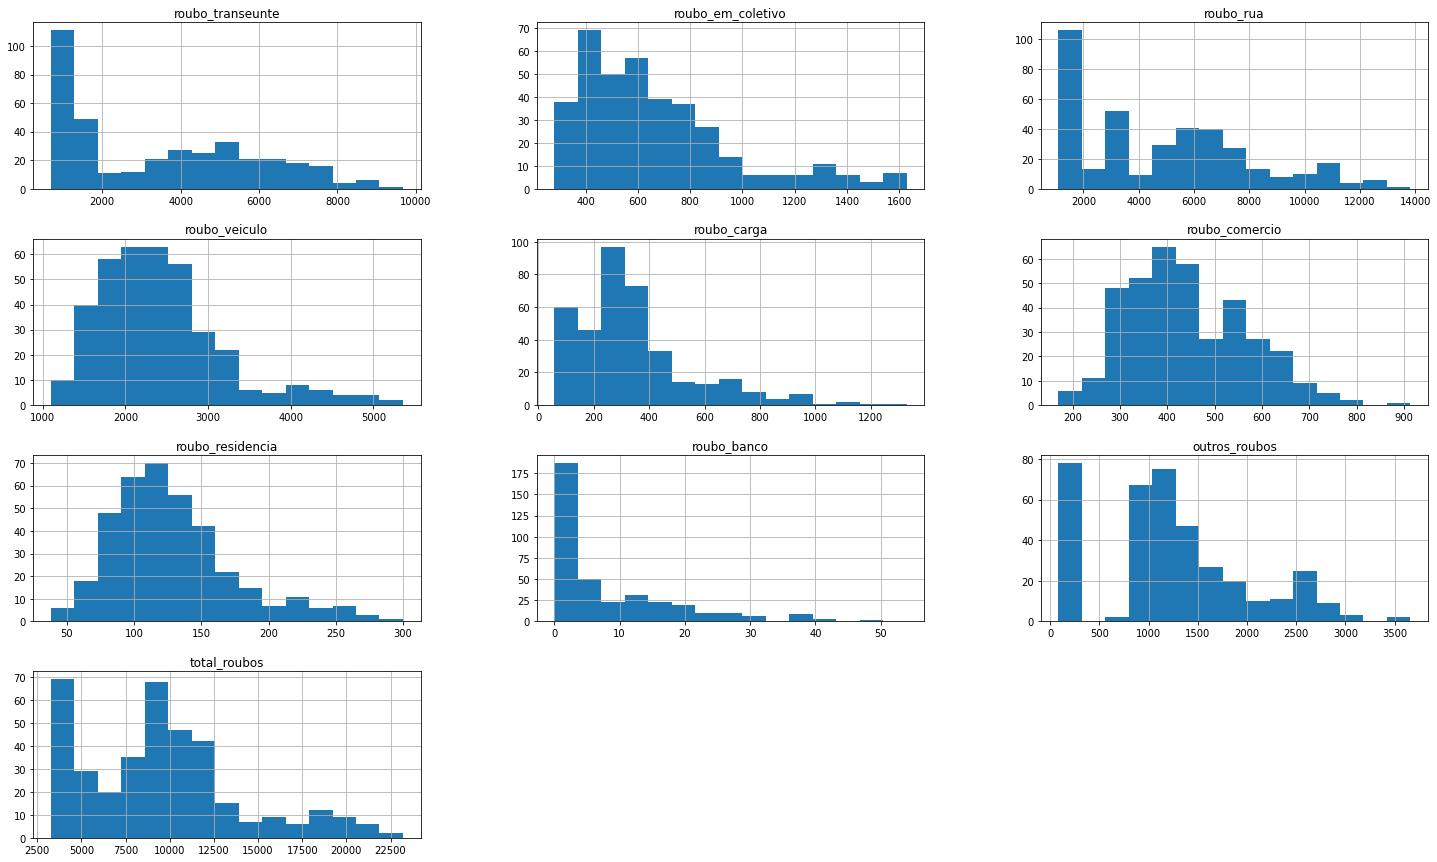

In [50]:
df_roubo = df.iloc[: , 13:28]
df_roubo.hist(bins=15, figsize=(25, 15));

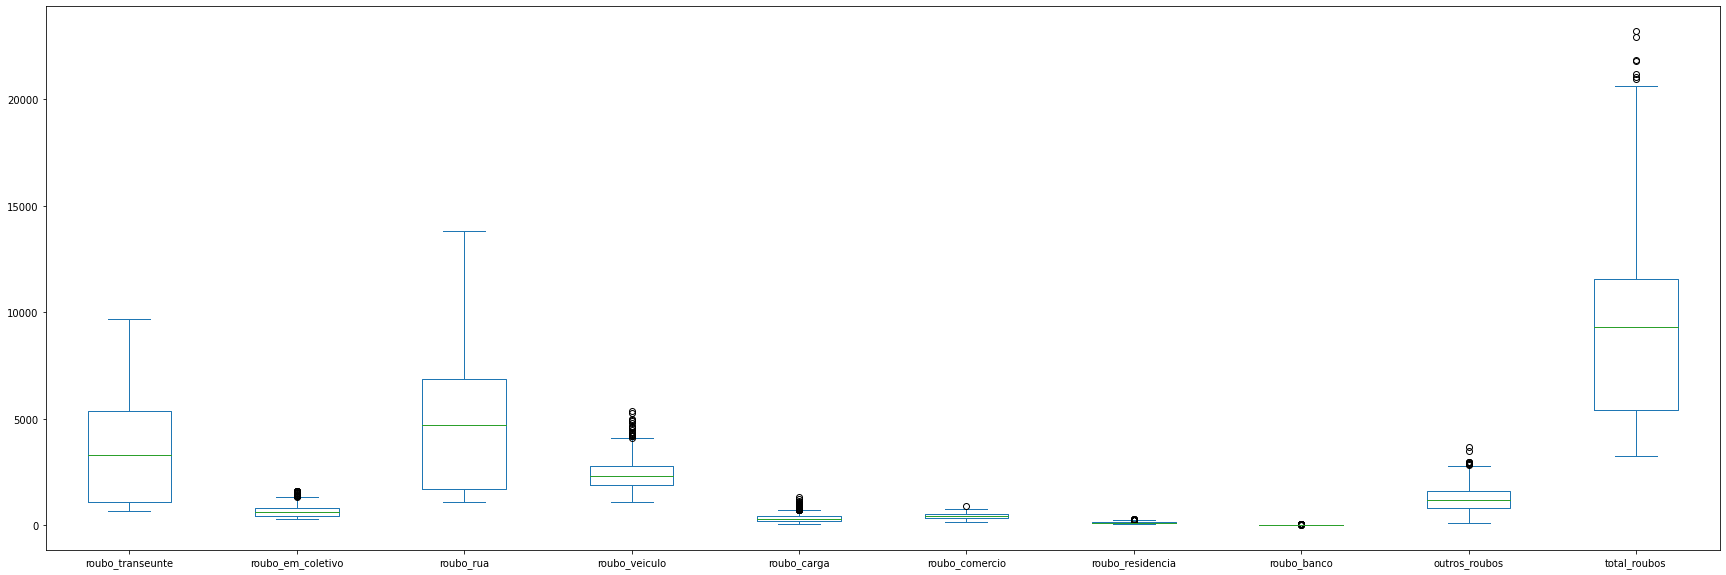

In [40]:
#vamos verificar a presença de outliers
df_roubo.plot(kind='box', figsize=(30, 10));

### **Q4. Qual a correlação entre as variáveis estudadas?**

Aqui verificamos a correlação entre os diversos tipos de roubos, mas devemos lembrar que correlação não é causa e efeito.

In [42]:
corr = df_roubo.corr()
corr

,roubo_transeunte,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,outros_roubos,total_roubos
roubo_transeunte,1.000000,0.744193,0.979363,0.558935,0.724317,0.349140,-0.332983,-0.634589,0.395191,0.904245
roubo_em_coletivo,0.744193,1.000000,0.822536,0.726589,0.751154,0.199289,-0.305349,-0.461163,0.531644,0.839511
roubo_rua,0.979363,0.822536,1.000000,0.654759,0.799340,0.363641,-0.353056,-0.645847,0.520279,0.960349
roubo_veiculo,0.558935,0.726589,0.654759,1.000000,0.785125,0.518667,-0.039016,-0.364788,0.715470,0.813482
roubo_carga,0.724317,0.751154,0.799340,0.785125,1.000000,0.424213,-0.316900,-0.514558,0.622313,0.867545
roubo_comercio,0.349140,0.199289,0.363641,0.518667,0.424213,1.000000,0.198484,-0.216565,0.496087,0.487134
roubo_residencia,-0.332983,-0.305349,-0.353056,-0.039016,-0.316900,0.198484,1.000000,0.363947,-0.287334,-0.304496
roubo_banco,-0.634589,-0.461163,-0.645847,-0.364788,-0.514558,-0.216565,0.363947,1.000000,-0.528480,-0.646374
outros_roubos,0.395191,0.531644,0.520279,0.715470,0.622313,0.496087,-0.287334,-0.528480,1.000000,0.710052
total_roubos,0.904245,0.839511,0.960349,0.813482,0.867545,0.487134,-0.304496,-0.646374,0.710052,1.000000


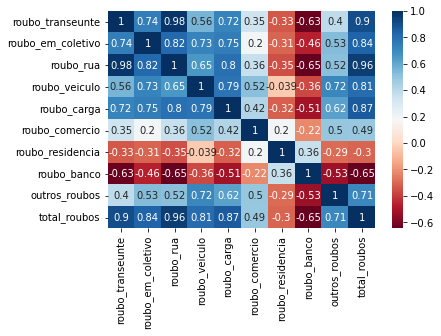

In [46]:
sns.heatmap(corr, cmap='RdBu', annot=True);

### **Q5. Qual a quantidade de roubos ao longo do tempo ?**

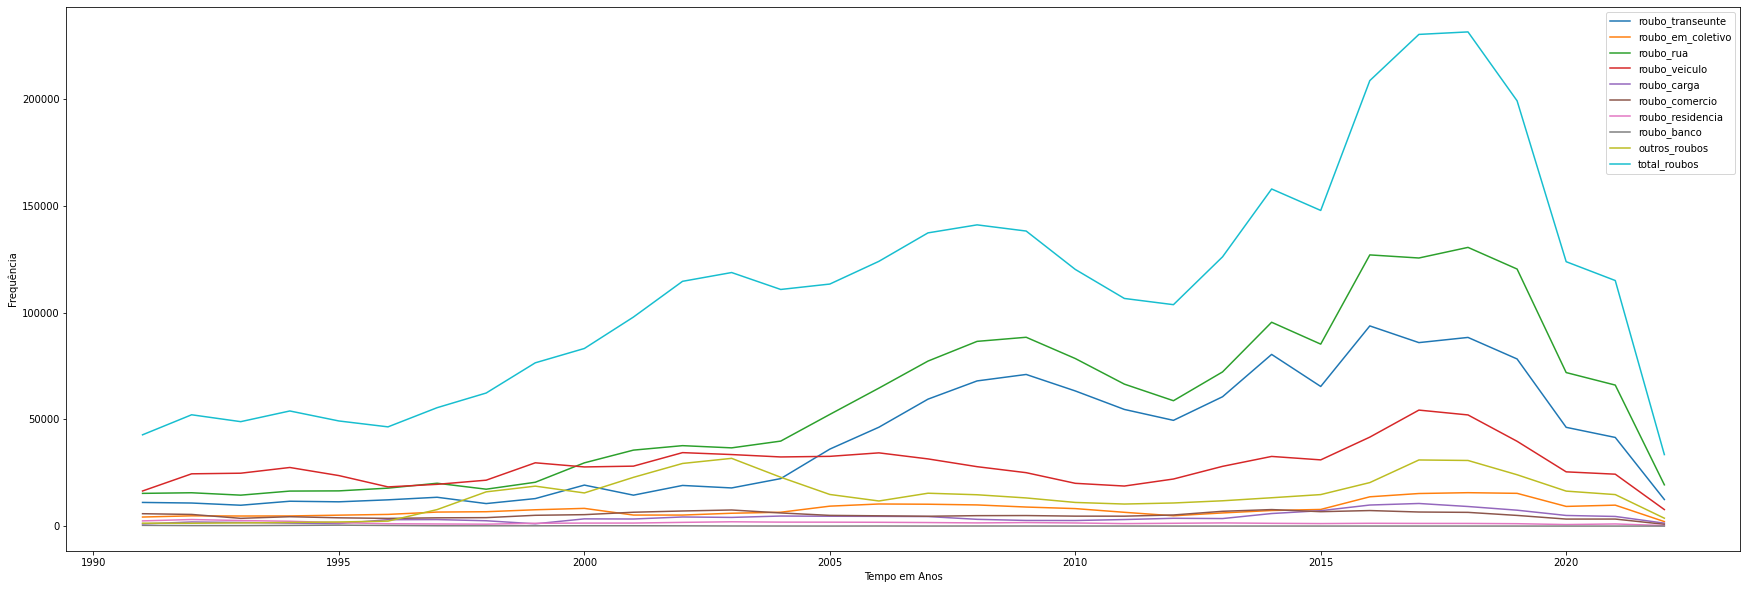

In [74]:
df_roubo.index = df['ano']
df_roubo.groupby('ano').sum().plot(xlabel='Tempo em Anos', ylabel='Frequência', figsize=(30, 10));

## **Conclusões**

A partir do grafico da quantidade de crimes ao longo dos anos, podemos perceber um aumento na quantidade de crimes totais, verificando como o maior aumento no período de 2015 à 2018, sendo possivel verificar uma grande queda de 2018 à 2021, um estudo mais elaborado teria que ser feito para que possamos informar com certeza o motivo dessa queda drastica, mas tendo em conta o período de pandemia por covid19 poderiamos atribuir a queda à reclusão da população por conta da doença, o baixo número de casos em 2022 se dá por conta de ainda estarmos no mês 06 do ano.